In [1]:
# import open3d as o3d
import numpy as np
# from open3d.examples import open3d_example as o3dtut
from stl import mesh
%matplotlib widget
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
from pathlib import Path
%load_ext autoreload
%autoreload 2

In [2]:
# -*- coding: utf-8 -*-
"""
% Matlab script read_bntfile.m was created, Arman Savran, 2008
% Converted from the Matlab code, Kevin Mader October, 2019
% Rearranged, Arman Savran, May 2021
"""

import numpy as np


def fread(file_id, shape, dtype):
    """Hack np into fread from matlab"""
    count = np.prod(shape)
    return np.fromfile(file_id, dtype=dtype, count=count).reshape(shape, order='F')


def read_bntfile(filepath):
    """
    % Author: Arman Savran (arman.savran@boun.edu.tr)
    % Date:   2008
    % Outputs:
    %   zmin      : minimum depth value denoting the background
    %   nrows     : subsampled number of rows
    %   ncols     : subsampled number of columns
    %   imfile    : image file name
    %   data      : Nx5 matrix where columns are 3D coordinates and 2D
    %   normalized image coordinates respectively. 2D coordinates are
    %   normalized to the range [0,1]. N = nrows*ncols. In this matrix, values
    %   that are equal to zmin denotes the background.
    """
    with open(filepath, 'rb') as fid:
        # H is unsigned short
        nrows = fread(fid, 1, 'uint16')[0]
        ncols = fread(fid, 1, 'uint16')[0]
        zmin = fread(fid, 1, 'float64')[0]
        len1 = fread(fid, 1, 'uint16')[0]
        imfile = fread(fid, (len1, ), 'uint8')
        imfile_name = "".join(map(chr, imfile))
        assert filepath.stem in imfile_name, "Names should match {} in {}".format(imfile_name, filepath.stem)
        len2 = fread(fid, 1, 'uint32')[0]
        data = fread(fid, [len2//5, 5], 'float64')
        data[data == zmin] = np.NAN # remove background

        return nrows, ncols, data


In [4]:
# Read single sample (might give error in some bnt files)
filepath = "/mnt/disk5/batu/myprojects/e-mesh-attack/BosphorusDB/bs000/bs000_E_DISGUST_0.bnt"
my_path = Path(filepath)
nrows, ncols, data = read_bntfile(my_path)

import imageio.v3 as iio

im = iio.imread(my_path.with_suffix('.png'))
print(im.shape)

(1380, 1128, 3)


In [5]:
labels_str2int_dict = {
    "ANGER":0,
    "DISGUST":1,
    "FEAR":2,
    "HAPPY":3,
    "SADNESS":4,
    "SURPRISE":5,
}
labels_int2str_dict = dict((v, k) for k, v in labels_str2int_dict.items())

data_folder = Path("./BosphorusDB")


In [6]:
# Store errored file list
no_errored_files = 0
list_of_errored_files = []
people = []

# Keep working bnt file data and labels
clean_data = []
clean_label = []
for i, p in enumerate(sorted(data_folder.glob('**/*_E_*.bnt'))):
    print(i, p)
    people.append(p.parent.stem)
    try:
        _, _, data = read_bntfile(p) # Read data
        label = p.stem.split("_E_")[-1][:-2] # Get label
        # Store
        clean_data.append(data)
        clean_label.append(label)
    except:
        no_errored_files +=1 # Incase of error, increment count
        list_of_errored_files.append(p)

0 BosphorusDB/bs000/bs000_E_ANGER_0.bnt
1 BosphorusDB/bs000/bs000_E_DISGUST_0.bnt
2 BosphorusDB/bs000/bs000_E_FEAR_0.bnt
3 BosphorusDB/bs000/bs000_E_HAPPY_0.bnt
4 BosphorusDB/bs000/bs000_E_SADNESS_0.bnt
5 BosphorusDB/bs000/bs000_E_SURPRISE_0.bnt
6 BosphorusDB/bs001/bs001_E_ANGER_0.bnt
7 BosphorusDB/bs001/bs001_E_DISGUST_0.bnt
8 BosphorusDB/bs001/bs001_E_FEAR_0.bnt
9 BosphorusDB/bs001/bs001_E_HAPPY_0.bnt
10 BosphorusDB/bs001/bs001_E_SADNESS_0.bnt
11 BosphorusDB/bs001/bs001_E_SURPRISE_0.bnt
12 BosphorusDB/bs002/bs002_E_ANGER_0.bnt
13 BosphorusDB/bs002/bs002_E_DISGUST_0.bnt
14 BosphorusDB/bs002/bs002_E_FEAR_0.bnt
15 BosphorusDB/bs002/bs002_E_HAPPY_0.bnt
16 BosphorusDB/bs002/bs002_E_SADNESS_0.bnt
17 BosphorusDB/bs002/bs002_E_SURPRISE_0.bnt
18 BosphorusDB/bs003/bs003_E_ANGER_0.bnt
19 BosphorusDB/bs003/bs003_E_DISGUST_0.bnt
20 BosphorusDB/bs003/bs003_E_FEAR_0.bnt
21 BosphorusDB/bs003/bs003_E_HAPPY_0.bnt
22 BosphorusDB/bs003/bs003_E_SADNESS_0.bnt
23 BosphorusDB/bs003/bs003_E_SURPRISE_0.bnt
24

In [7]:
# Each person has different no of expressions
np.unique(people, return_counts=True)

(array(['bs000', 'bs001', 'bs002', 'bs003', 'bs004', 'bs005', 'bs006',
        'bs007', 'bs008', 'bs009', 'bs010', 'bs011', 'bs012', 'bs013',
        'bs014', 'bs015', 'bs016', 'bs017', 'bs018', 'bs019', 'bs020',
        'bs021', 'bs022', 'bs023', 'bs024', 'bs025', 'bs026', 'bs027',
        'bs028', 'bs029', 'bs030', 'bs031', 'bs032', 'bs033', 'bs034',
        'bs035', 'bs036', 'bs037', 'bs038', 'bs039', 'bs040', 'bs041',
        'bs042', 'bs043', 'bs044', 'bs045', 'bs046', 'bs047', 'bs048',
        'bs049', 'bs050', 'bs051', 'bs052', 'bs053', 'bs054', 'bs055',
        'bs056', 'bs057', 'bs058', 'bs059', 'bs060', 'bs061', 'bs062',
        'bs063', 'bs064', 'bs065', 'bs066', 'bs067', 'bs068', 'bs069',
        'bs070', 'bs071', 'bs072', 'bs073', 'bs074', 'bs075', 'bs076',
        'bs077', 'bs078', 'bs079', 'bs080', 'bs081', 'bs082', 'bs083',
        'bs084', 'bs085', 'bs086', 'bs087', 'bs088', 'bs089', 'bs090',
        'bs091', 'bs092', 'bs093', 'bs094', 'bs095', 'bs096', 'bs097',
      

In [10]:
no_errored_files

95

In [11]:
len(clean_data)

358

In [12]:
def sample_4096_point(data, seed=0):
    # Set seed
    np.random.seed(seed)
    # Drop rows with nan in first 3 elements
    cleared_data = data[(np.isnan(data)[:,:3].sum(axis=1))==0]
    # Choose 4096 random rows 
    selected_indices = np.random.choice(range(len(cleared_data)), size=4096)
    subsampled_data = cleared_data[selected_indices]
    return subsampled_data

In [13]:
labels_str2int_dict[label]

5

In [14]:
# Process read data
processed_data = []
processed_label = []
for i in range(len(clean_data)):
    out_data = sample_4096_point(clean_data[i], seed=i)
    processed_data.append(out_data)
    label = clean_label[i]
    processed_label.append(labels_str2int_dict[label])

SURPRISE


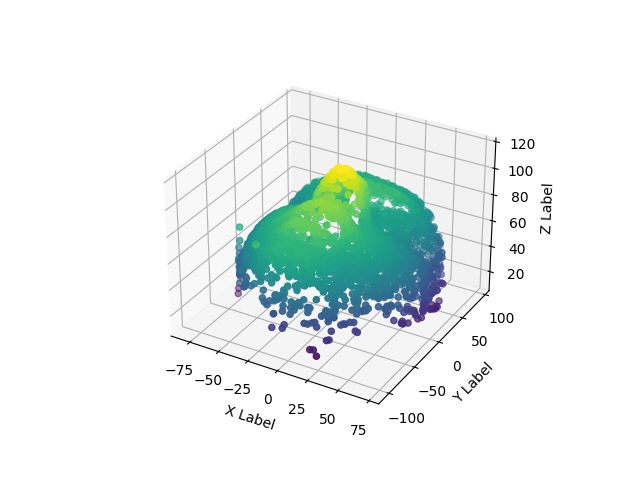

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

data_ind = 200
subsampled_data = processed_data[data_ind]
subsampled_label = processed_label[data_ind]

x_vals = subsampled_data[:,0]
y_vals = subsampled_data[:,1]
z_vals = subsampled_data[:,2]
ax.scatter(x_vals, y_vals, z_vals, c=z_vals)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

print(labels_int2str_dict[subsampled_label])
plt.show()